* `Decision Tree Classification`

     *Problem: This lab demonstrates training a Decision Tree on the Play Tennis dataset. The club wants to predict whether members will play tennis on a given day based on weather conditions.


`Step-1: Import Labraries`

In [5]:
import pandas as pd

`Step-2: Load dataset`

In [6]:
dt=pd.read_csv("Play_Tennis.csv")

Step-3: `Data Decription`

In [7]:
dt

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Cool,Normal,Weak,No
1,Rain,Cool,High,Weak,No
2,Rain,Mild,High,Strong,Yes
3,Overcast,Mild,High,Strong,No
4,Overcast,Cool,High,Weak,Yes
...,...,...,...,...,...
995,Overcast,Mild,Normal,Weak,No
996,Rain,Mild,Normal,Weak,Yes
997,Overcast,Hot,Normal,Weak,No
998,Rain,Mild,Normal,Weak,No


In [8]:
dt.isnull().sum()

,0
Outlook,0
Temperature,0
Humidity,0
Wind,0
Play,0


In [9]:
dt.shape

(1000, 5)

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      1000 non-null   object
 1   Temperature  1000 non-null   object
 2   Humidity     1000 non-null   object
 3   Wind         1000 non-null   object
 4   Play         1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


`Step-4. Feature-target split`

In [11]:
X = dt.drop("Play", axis=1)
y = dt["Play"]

 `Step-5: Identify Categorical Features`

In [12]:
categorical_features = ["Outlook", "Temperature", "Humidity", "Wind"]

*   `categorical_features`

     * categorical_features is stores the names of all categorical columns in the dataset.
     * Categorical columns are those that contain discrete, non-numeric values, like strings or labels, rather than continuous numbers.
     * non-numeric features that need to be converted into numeric form before training a machine learning model.

* `Contents`
     * "Outlook" → The weather outlook (e.g., Sunny, Overcast, Rain)
     * "Temperature" → The temperature category (e.g., Hot, Mild, Cool)
     * "Humidity" → The humidity level (e.g., High, Normal)
    * "Wind" → The wind condition (e.g., Weak, Strong)
* All of these are non-numeric features that need to be converted into numeric form before training a machine learning model.

* `Why We Define This`
     * Many ML algorithms, including Decision Trees and Random Forests in scikit-learn, require numeric input.
     * By specifying categorical_features, we can later apply preprocessing (like LabelEncoder or OneHotEncoder) only to these columns, while leaving numeric features unchanged.

`Step-6: Preprocessing (One-hot encoding)`

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

* `Explaination:`
     
* `from sklearn.preprocessing import OneHotEncoder`
     * Imports the OneHotEncoder class from scikit-learn.
     * Converts categorical features (like Outlook or Wind) into numeric format suitable for ML algorithms.
* `How it works: `
     * For a categorical feature with n unique values, it creates n binary columns (0 or 1) representing each category.
* `Example:`

| Outlook  | Sunny | Overcast | Rain |
| -------- | ----- | -------- | ---- |
| Sunny    | 1     | 0        | 0    |
| Rain     | 0     | 0        | 1    |
| Overcast | 0     | 1        | 0    |


* `from sklearn.compose import ColumnTransformer`
     * Imports ColumnTransformer, which allows you to apply different preprocessing to different columns of your dataset.
     * Used to scale numeric features, one-hot encode categorical features, or leave some features untouched — ColumnTransformer handles this cleanly.

* `ColumnTransformer([...])`
     * Defines a transformer that applies specific transformations to specific columns.
     * ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
     * "cat" → The name of this transformer (arbitrary, useful for pipelines).
* `OneHotEncoder(handle_unknown="ignore") →` Applies one-hot encoding to the selected columns.
     * handle_unknown="ignore" means if a category appears in test data that was not in training data, it will not throw an error.
* `categorical_features → `The list of columns to apply this transformer (defined earlier: ["Outlook","Temperature","Humidity","Wind"]).
* `Result`-preprocessor is now an object that can fit and transform your categorical features into numeric form.
* you can use it in a pipeline:

 `Step-7: Train-test Split`

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

`Step-8: Build ML pipeline with Decision Tree`

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
model = Pipeline([("preprocessor", preprocessor),
("classifier", DecisionTreeClassifier(criterion="entropy", random_state=42))
])

`from sklearn.pipeline import Pipeline`

`Note:` `Why Pipeline`
     
     * Pipelines allow you to chain multiple steps (like preprocessing + model training) into a single object.
* `Benefits:`
     * Cleaner code
     * Ensures the same preprocessing is applied to train/test data
     * Avoids data leakage

* `from sklearn.tree import DecisionTreeClassifier`
     * This is the Ml algorithm we will use to classify whether to play tennis or not.
* `Parameters used:`
     * criterion="entropy" → Uses information gain to split nodes (other option: "gini").
     * random_state=42 → Fixes the randomness so results are reproducible.


* model = Pipeline([ ("preprocessor", preprocessor),
    * ("classifier", DecisionTreeClassifier(criterion="entropy" random_state=42) ])

* `Pipeline([...])`
     * Creates a pipeline object that executes steps sequentially.
* `("preprocessor", preprocessor)`
     * The first step is named "preprocessor" (the name is arbitrary).
     * It uses the preprocessor object we defined earlier (ColumnTransformer with OneHotEncoder).
     * What it does: transforms categorical columns into numeric format before feeding them to the model.
* `("classifier", DecisionTreeClassifier(...))`
     * The second step is named "classifier".
     * It trains a Decision Tree on the preprocessed data.

* `How it works together`
* When you call:
    * model.fit(X_train, y_train)
* The pipeline automatically applies preprocessing to X_train (one-hot encoding categorical features).
* Then it trains the Decision Tree on the transformed data.

7. `Train model`

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Outlook', 'Temperature',
                                                   'Humidity', 'Wind'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

8. `Predictions`

In [17]:
y_pred = model.predict(X_test)

* The pipeline applies the same preprocessing to X_test.
*  it uses the trained Decision Tree to predict labels.

9. `Model Evaluation`

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# --- Accuracy, Precision, Recall, F1 Score ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label="Yes")
rec = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")

print("Accuracy:", round(acc, 2))
print("Precision:", round(prec,2))
print("Recall:", round(rec,2))
print("F1 Score:", round(f1,2))

Accuracy: 0.47
Precision: 0.53
Recall: 0.38
F1 Score: 0.44


In [19]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[52 37]
 [69 42]]


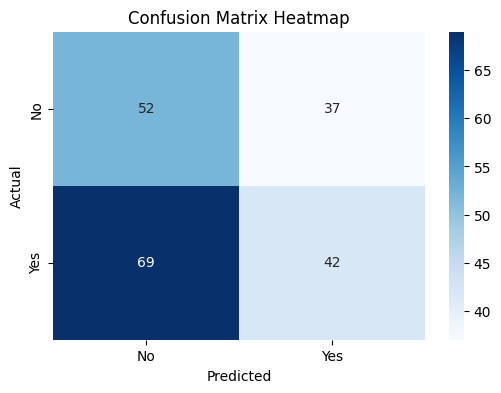

In [20]:
# --- Confusion Matrix Heatmap ---
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [21]:
# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.43      0.58      0.50        89
         Yes       0.53      0.38      0.44       111

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.49      0.47      0.47       200



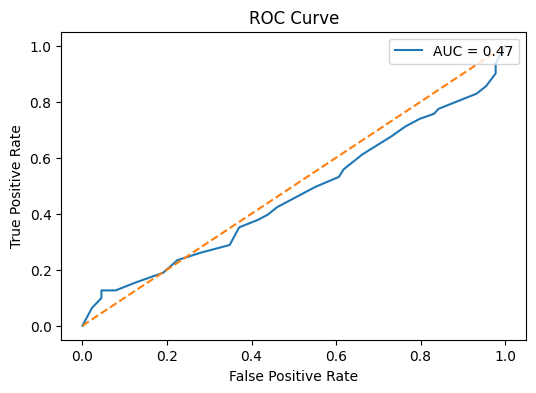

ROC AUC Score: 0.47


In [22]:
# --- ROC Curve & AUC ---
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Convert Yes/No to 0/1
y_pred_prob = model.predict_proba(X_test)[:,1]  # Probability of "Yes"
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper right')
plt.show()
print("ROC AUC Score:", round(roc_auc,2))

10. `Decision Tree Visualization`

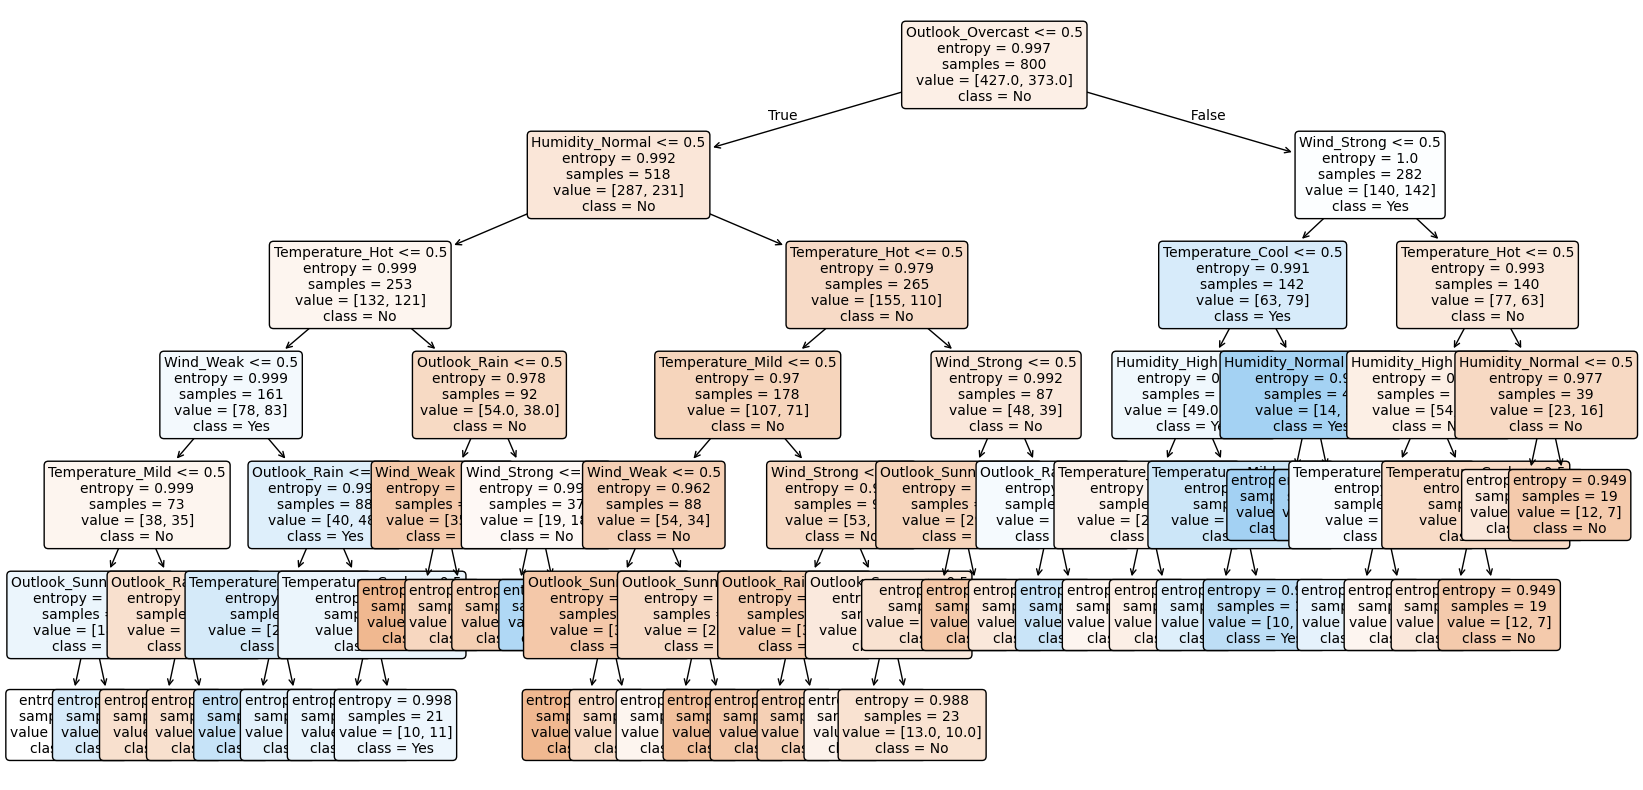

In [23]:
# Extract trained classifier
clf = model.named_steps["classifier"]

# Get OneHotEncoded feature names
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = ohe.get_feature_names_out(categorical_features)

# Plot the decision tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=ohe_features,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [24]:
# --- Hyperparameter Tuning (GridSearchCV) ---
from sklearn.model_selection import GridSearchCV
param_grid = {
'classifier__max_depth': [None, 3, 5, 10],
'classifier__criterion': ['gini', 'entropy'],
'classifier__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best Score: 0.53125


11. `Cross-validation accurac`

In [25]:
# Compute 5-fold cross-validation accuracy on the whole pipeline
# This gives a more reliable estimate of expected performance.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Accuracy (already built-in)
cv_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validation Accuracy (5-fold):', cv_accuracy)
print('Mean CV Accuracy: {:.4f}'.format(cv_accuracy.mean()))

# Precision
precision_scorer = make_scorer(precision_score, pos_label="Yes")
cv_precision = cross_val_score(model, X, y, cv=5, scoring=precision_scorer)
print('Cross-validation Precision (5-fold):', cv_precision)
print('Mean CV Precision: {:.4f}'.format(cv_precision.mean()))

# Recall
recall_scorer = make_scorer(recall_score, pos_label="Yes")
cv_recall = cross_val_score(model, X, y, cv=5, scoring=recall_scorer)
print('Cross-validation Recall (5-fold):', cv_recall)
print('Mean CV Recall: {:.4f}'.format(cv_recall.mean()))

# F1-score
f1_scorer = make_scorer(f1_score, pos_label="Yes")
cv_f1 = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
print('Cross-validation F1-score (5-fold):', cv_f1)
print('Mean CV F1-score: {:.4f}'.format(cv_f1.mean()))

Cross-validation Accuracy (5-fold): [0.5   0.475 0.48  0.455 0.49 ]
Mean CV Accuracy: 0.4800
Cross-validation Precision (5-fold): [0.47560976 0.43939394 0.45070423 0.40909091 0.45901639]
Mean CV Precision: 0.4468
Cross-validation Recall (5-fold): [0.40625    0.29896907 0.32989691 0.27835052 0.28865979]
Mean CV Recall: 0.3204
Cross-validation F1-score (5-fold): [0.43820225 0.35582822 0.38095238 0.33128834 0.35443038]
Mean CV F1-score: 0.3721


* `Note:`
     * cross_val_score performs 5-fold cross-validation and returns scores for each fold.
     * make_scorer allows using Precision, Recall, F1 (since they are not built-in scoring metrics by default).
     * pos_label="Yes" ensures the metrics treat "Yes" as the positive class.

12. `Predict for a Single New Observation`

In [26]:
# Example test sample
new_data = pd.DataFrame({
    "Outlook": ["Sunny"],
    "Temperature": ["Hot"],
    "Humidity": ["High"],
    "Wind": ["Weak"]
})
# Predict
single_pred = model.predict(new_data)
print("Prediction for New Data:", single_pred[0])

Prediction for New Data: No


In [27]:
proba = model.predict_proba(new_data)
print("Prediction Probabilities:", proba)

Prediction Probabilities: [[0.59375 0.40625]]


In [28]:
new_data2 = pd.DataFrame({
    "Outlook": ["Overcast"],
    "Temperature": ["Cool"],
    "Humidity": ["Normal"],
    "Wind": ["Strong"]
})
pred2 = model.predict(new_data2)
print("\nPrediction for New Data 2:", pred2[0])

proba2 = model.predict_proba(new_data2)
print("Prediction Probabilities 2:", proba2)


Prediction for New Data 2: Yes
Prediction Probabilities 2: [[0.46428571 0.53571429]]


In [29]:
# --- Save the Model ---
import joblib
joblib.dump(model, "decision_tree_playtennis.pkl")

['decision_tree_playtennis.pkl']